In [9]:
import pandas as pd
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("baseDF.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [3]:
df.head()

,vintage_name,vintage_wine_name,vintage_wine_vintage_type,vintage_wine_is_natural,vintage_wine_region_name,vintage_wine_winery_name,vintage_wine_taste_structure_acidity,vintage_wine_taste_structure_intensity,vintage_wine_taste_structure_sweetness,vintage_wine_taste_structure_tannin,vintage_wine_statistics_ratings_count,vintage_wine_statistics_ratings_average,vintage_year,price_amount,price_type
0,Château La Gaffelière Saint-Émilion Grand Cru ...,Saint-Émilion Grand Cru (Premier Grand Cru Cla...,0,False,Saint-Émilion Grand Cru,Château La Gaffelière,3.393317,4.161898,1.645648,3.472225,12372,4.2,2018,111.06,vc
1,Château les Carmes Haut-Brion Pessac-Léognan 2000,Pessac-Léognan,0,False,Pessac-Léognan,Château les Carmes Haut-Brion,4.181608,4.269841,1.772998,4.293946,4896,4.1,2000,144.00,vc
2,M. Chapoutier Hermitage Monier de la Sizeranne...,Hermitage Monier de la Sizeranne,0,False,Hermitage,M. Chapoutier,3.485171,4.535746,1.693488,3.932885,6000,4.2,2013,138.00,vc
3,Château Latour à Pomerol Pomerol 2015,Pomerol,0,False,Pomerol,Château Latour à Pomerol,3.358971,4.121100,1.673557,3.434288,5976,4.3,2015,120.24,vc
4,Château Calon-Ségur Saint-Estèphe (Grand Cru C...,Saint-Estèphe (Grand Cru Classé),0,False,Saint-Estèphe,Château Calon-Ségur,4.231590,4.171028,1.634074,4.242128,25209,4.2,2018,150.00,vc


In [19]:
#Checking the correlation to our target

#We create a new df
df2=df.copy()
#for all non numerical columns
query_cols=df2.select_dtypes(exclude=['number']).columns
for cols in query_cols:
    #we convert them to numerical
    df2[cols]=df2[cols].astype('category').cat.codes
#and check the correlation to the target
df2.corr()["vintage_wine_statistics_ratings_average"].abs().sort_values(ascending=False).round(2)

vintage_wine_statistics_ratings_average    1.00
vintage_year                               0.47
vintage_wine_taste_structure_sweetness     0.44
vintage_wine_statistics_ratings_count      0.40
price_amount                               0.24
vintage_wine_region_name                   0.23
vintage_wine_name                          0.16
vintage_wine_taste_structure_intensity     0.12
vintage_wine_is_natural                    0.07
vintage_wine_winery_name                   0.03
vintage_wine_taste_structure_tannin        0.02
vintage_name                               0.02
vintage_wine_vintage_type                  0.01
vintage_wine_taste_structure_acidity       0.01
price_type                                 0.01
Name: vintage_wine_statistics_ratings_average, dtype: float64

c:\Users\nicol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='vintage_wine_statistics_ratings_average', ylabel='Density'>

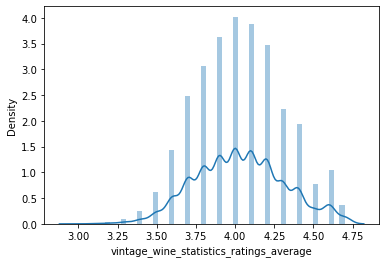

In [27]:
#the distribution is nice and almost normal, no work needed on the target
sns.distplot(df["vintage_wine_statistics_ratings_average"])

In [25]:
px.scatter(df, x="vintage_year", y="vintage_wine_statistics_ratings_average")

In [28]:
px.scatter(df, x="vintage_wine_taste_structure_sweetness", y="vintage_wine_statistics_ratings_average")

In [29]:
px.scatter(df, x="vintage_wine_statistics_ratings_count", y="vintage_wine_statistics_ratings_average")   

In [30]:
px.scatter(df, x="price_amount", y="vintage_wine_statistics_ratings_average") 

In [53]:
#creating a function to detect outliers
def detectoutliers(df, listofcolumns):
    detected=0
    for cols in listofcolumns:
        #calculating IQR
        Q1 = df[cols].quantile(0.25)
        Q3 = df[cols].quantile(0.75)
        IQR = Q3 - Q1
        # counting outliers
        outliers = [x for x in df[cols] if x < (Q1 - 1.5 * IQR) or x > (Q3 + 1.5 * IQR)]
        print('In column {}, identified {} outliers, {} % of the values .'.format(cols,len(outliers),round(len(outliers)/df[cols].count()*100,2)))
        detected+=len(outliers)
    print(f"Detected a total of {detected} lines")

In [54]:
query_cols=df.select_dtypes(include=['number']).columns
detectoutliers(df,list(query_cols))

In column vintage_wine_vintage_type, identified 10 outliers, 0.06 % of the values .
In column vintage_wine_taste_structure_acidity, identified 0 outliers, 0.0 % of the values .
In column vintage_wine_taste_structure_intensity, identified 2282 outliers, 13.38 % of the values .
In column vintage_wine_taste_structure_sweetness, identified 791 outliers, 4.64 % of the values .
In column vintage_wine_taste_structure_tannin, identified 22 outliers, 0.13 % of the values .
In column vintage_wine_statistics_ratings_count, identified 1923 outliers, 11.28 % of the values .
In column vintage_wine_statistics_ratings_average, identified 9 outliers, 0.05 % of the values .
In column vintage_year, identified 1561 outliers, 9.15 % of the values .
In column price_amount, identified 2221 outliers, 13.02 % of the values .
Detected a total of 8819 lines


There are a number of outliers, we will keep them for now, bu we will kep it in mind if we go to a linear regression model
or something with result impacted by outliers